# Tuning SVM and XGBoost

This notebook will show how to tune a SVM's and XGBoost hyperparameters using a **genetic algorithm**. The NN will be evaluated on the sonar dataset. 

The datasety can be found in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))



## Importing the main packages

In [2]:
import pandas as pd
from evolution_opt.genetic import *

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import xgboost as xgb


## Reading and preparing sonar dataset

In [3]:
# load dataset
dataframe = pd.read_csv('sonar_dataset.txt', header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

## Coding the evaluation function

In [4]:
def evaluate_svm(param_dict):
    '''
    This function will create and evaluate a NN based on the parameters of a given individual
    '''
    # evaluate baseline model with standardized dataset
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('svm', SVC(C=param_dict['C'], kernel=param_dict['kernel'], 
                                  gamma=param_dict['gamma'], degree=param_dict['degree'])))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=3, shuffle=True)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
    #Returns the average accuracy across the cross validation splits
    return np.mean(results)

## Defining the search space

In [5]:
search_space = [
    Integer(1, 1000, 'C', step = 10),
    Categorical(['rbf', 'linear', 'poly', 'sigmoid'], 'kernel'),
    Real(0.001, 0.1, 'gamma', precision = 3),
    Integer(1,5, 'degree')
]

**Note**: A dropout percentage inferior to 0.5 means no dropout

## Sense-checking prior distributions

**Note**: defining a prior distribution is not compulsory. The default prior distribution is uniform.

Parameter Name: gamma 
Prior Distribution: uniform


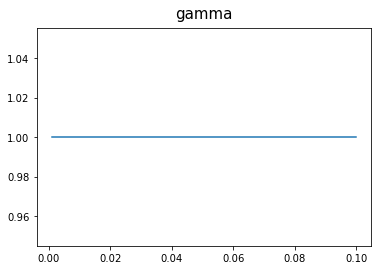

In [6]:
for param in search_space:
    if param.var_type == 'real':
        param.plot_prior()

## Running the optimisation function

In [9]:
best_params = optimise(evaluate_svm, search_space,
             minimize=False, population_size=10,
             n_rounds=500, n_children=10, verbose=False)

Number of Iterations: 500
Best score: 0.9136645962732919
Best parameters: {'C': 571, 'kernel': 'rbf', 'gamma': 0.021, 'degree': 1}


In [10]:
best_params

{'C': 571, 'kernel': 'rbf', 'gamma': 0.021, 'degree': 1}

In [12]:
def evaluate_xgboost(param_dict):
    '''
    This function will create and evaluate a NN based on the parameters of a given individual
    '''
    # evaluate baseline model with standardized dataset
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('xgb', xgb.XGBClassifier(objective='binary:logistic', learning_rate=param_dict['learning_rate'],
                                               gamma=param_dict['gamma'], max_depth=param_dict['max_depth'],
                                               min_child_weight=param_dict['min_child_weight'], subsample=param_dict['subsample'], 
                                                colsample_bytree=param_dict['colsample'])))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=3, shuffle=True)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
    #Returns the average accuracy across the cross validation splits
    return np.mean(results)

In [13]:
search_space = [
    Real(0, 0.9, 'learning_rate'),
    Integer(2, 15, 'max_depth'),
    Real(0, 5, 'gamma'),
    Integer(2, 15, 'min_child_weight'),
    Real(0.1, 1, 'subsample'),
    Real(0.1, 1, 'colsample')
]

In [16]:
best_params = optimise(evaluate_xgboost, search_space,
             minimize=False, population_size=10,
             n_rounds=100, n_children=10, verbose=True)

Working on evolution round: 1
Best score: 0.8124223602484472
Best parameters: {'learning_rate': 0.178, 'max_depth': 4, 'gamma': 4.876, 'min_child_weight': 2, 'subsample': 0.911, 'colsample': 0.437}
Working on evolution round: 2
Best score: 0.8269151138716356
Best parameters: {'learning_rate': 0.325, 'max_depth': 6, 'gamma': 4.876, 'min_child_weight': 2, 'subsample': 0.911, 'colsample': 0.643}
Working on evolution round: 3
Best score: 0.8271221532091096
Best parameters: {'learning_rate': 0.714, 'max_depth': 5, 'gamma': 1.632, 'min_child_weight': 3, 'subsample': 0.9, 'colsample': 0.914}
Working on evolution round: 4
Best score: 0.831608005521049
Best parameters: {'learning_rate': 0.38, 'max_depth': 5, 'gamma': 1.632, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.914}
Working on evolution round: 5
Best score: 0.8557625948930295
Best parameters: {'learning_rate': 0.676, 'max_depth': 5, 'gamma': 1.572, 'min_child_weight': 3, 'subsample': 0.9, 'colsample': 0.914}
Working on evoluti

Working on evolution round: 43
Best score: 0.8703243616287094
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 44
Best score: 0.8703243616287094
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 45
Best score: 0.8703243616287094
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 46
Best score: 0.8703243616287094
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 47
Best score: 0.8703243616287094
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution

Working on evolution round: 85
Best score: 0.875224292615597
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 86
Best score: 0.875224292615597
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 87
Best score: 0.875224292615597
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 88
Best score: 0.875224292615597
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution round: 89
Best score: 0.875224292615597
Best parameters: {'learning_rate': 0.19, 'max_depth': 5, 'gamma': 0.042, 'min_child_weight': 2, 'subsample': 0.9, 'colsample': 0.437}
Working on evolution roun

In [17]:
best_params

{'learning_rate': 0.19,
 'max_depth': 5,
 'gamma': 0.042,
 'min_child_weight': 2,
 'subsample': 0.9,
 'colsample': 0.437}